In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal
from matplotlib.ticker import MaxNLocator
import math
import random
from IPython.display import HTML

N = 500
dy = 1/N
y = np.linspace(0,1,N+1)

In [7]:
def mL2V(y):
    return 1000*(y-y+1)**2

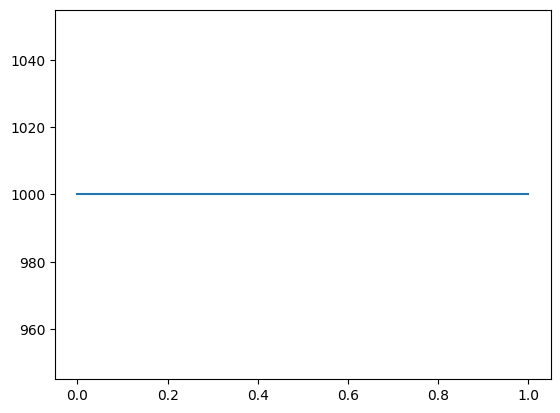

In [8]:
V = mL2V(y)
plt.plot(y,V)